In [1]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 少数第3位まで表示
%precision 3

'%.3f'

<h1>自動車価格データの取り込み</h1>

In [2]:
import requests, zipfile
import io

# 自動車価格データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content

# 取得したデータをDataFrameオブジェクトとして読み込み
auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# データの列にラベルを設定
auto.columns = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors',
                'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
                'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
                'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [3]:
print('自動車の形式:{}'.format(auto.shape))

自動車の形式:(205, 26)


In [4]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h1>データの整理</h1>

<h3>不適切なデータの削除</h3>

In [5]:
# それぞれのカラムに？が何個あるかのカウント
auto = auto[['price','horsepower','width','height']]
auto.isin(['?']).sum()

price         4
horsepower    2
width         0
height        0
dtype: int64

In [6]:
# ?をNaNに置換して、NaNがある行を削除
auto = auto.replace('?', np.nan).dropna()
print('自動車のデータの形式:{}'.format(auto.shape))

自動車のデータの形式:(199, 4)


<h3>型の変換</h3>

In [7]:
print('データの確認（型変換前）\n{}\n'.format(auto.dtypes))

データの確認（型変換前）
price          object
horsepower     object
width         float64
height        float64
dtype: object



In [8]:
auto = auto.assign(price=pd.to_numeric(auto.price))
auto = auto.assign(horsepower=pd.to_numeric(auto.horsepower))
print('データの確認（型変換後）\n{}\n'.format(auto.dtypes))

データの確認（型変換後）
price           int64
horsepower      int64
width         float64
height        float64
dtype: object



<h3>相関の確認</h3>

In [9]:
auto.corr()

,price,horsepower,width,height
price,1.000000,0.810533,0.753871,0.134990
horsepower,0.810533,1.000000,0.615315,-0.087407
width,0.753871,0.615315,1.000000,0.309223
height,0.134990,-0.087407,0.309223,1.000000


<h3>モデル構築と評価</h3>

In [10]:
# データ分割（訓練データとテストデータ）のためのインポート
from sklearn.model_selection import train_test_split

# 重回帰のモデル構築のためのインポート
from sklearn.linear_model import LinearRegression

# 目的変数にpriceを指定、説明変数にそれ以外を指定
X = auto.drop('price', axis=1)
y = auto['price']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 重回帰クラスの初期化と学習
model = LinearRegression()
model.fit(X_train, y_train)

# 決定係数を表示
print('決定係数(train):{:.3f}'.format(model.score(X_train, y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test, y_test)))

# 回帰係数と切片を表示
print('\n回帰係数\n{}'.format(pd.Series(model.coef_, index=X.columns)))
print('切片: {:.3f}'.format(model.intercept_))

決定係数(train):0.733
決定係数(test):0.737

回帰係数
horsepower      81.651078
width         1829.174506
height         229.510077
dtype: float64
切片: -128409.046


<h1>ロジスティック回帰</h1>

In [11]:
# データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
res = requests.get(url).content

# 取得したデータをDataFrameオブジェクトとして読み込み
adult = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# データの列にラベルを設定
adult.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'material-status',
                 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                 'hours-per-week', 'native-country', 'fig-50K']

# データの形式と欠損値を出力
print('データの形式:{}'.format(adult.shape))
print('欠損の数:{}'.format(adult.isnull().sum().sum()))

# データの先頭5行を出力
adult.head(10)

データの形式:(32561, 15)
欠損の数:0


,age,workclass,fnlwgt,education,education-num,material-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fig-50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


<h3>データの整理</h3>

In [12]:
adult.groupby('fig-50K').size()

fig-50K
 <=50K    24720
 >50K      7841
dtype: int64

In [13]:
# 「fin_fig」カラムを追加し、もし「fig-50k」カラムの値が「>50k」だったら1、そうでなければ0をセットする
adult['fin_fig'] = adult['fig-50K'].map(lambda x: 1 if x.strip() == '>50K' else 0)
adult.groupby('fin_fig').size()

fin_fig
0    24720
1     7841
dtype: int64

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 説明変数および目的関数の設定
X = adult[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss']]
y = adult['fin_fig']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# ロジスティック回帰クラスの初期化と学習
model = LogisticRegression()
model.fit(X_train, y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.797
正解率(test):0.798


In [15]:
model.coef_

array([[-1.185e-02, -4.379e-06, -2.774e-03,  3.274e-04,  7.532e-04]])

In [16]:
np.exp(model.coef_)

array([[0.988, 1.   , 0.997, 1.   , 1.001]])

<h1>スケーリングによる予測精度の向上</h1>

In [17]:
# 標準化のためのクラスをインポート
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Xとyを設定
X = adult[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss']]
y = adult['fin_fig']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# ロジスティック回帰クラスの初期化と学習
model = LogisticRegression()
model.fit(X_train_std, y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.811
正解率(test):0.810


<h1>重回帰とリッジ回帰</h1>

In [18]:
auto.head()

,price,horsepower,width,height
0,13495,111,64.1,48.8
1,16500,111,64.1,48.8
2,16500,154,65.5,52.4
3,13950,102,66.2,54.3
4,17450,115,66.4,54.3


In [19]:
# リッジ回帰のクラス
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# 訓練データとテストデータに分割
X = auto.drop('price', axis=1)
y = auto['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# モデル構築と評価
linear = LinearRegression()
ridge = Ridge(random_state=0)

for model in [linear, ridge]:
    model.fit(X_train, y_train)
    print('{}(train):{:.6f}'.format(model.__class__.__name__, model.score(X_train, y_train)))
    print('{}(test):{:.6f}'.format(model.__class__.__name__, model.score(X_test, y_test)))

LinearRegression(train):0.733358
LinearRegression(test):0.737069
Ridge(train):0.733355
Ridge(test):0.737768


<h1>決定木</h1>

In [20]:
# データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

# 取得したデータをDataFrameオブジェクトとして読み込み
mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# データの列にラベルを設定
mushroom.columns = ['classes', 'cap_shape', 'cap_surface', 'cap_color', 'odor', 'bruises',
                                'gill_attachiment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape',
                                'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring',
                                'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color',
                                'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']

mushroom.head()

,classes,cap_shape,cap_surface,cap_color,odor,bruises,gill_attachiment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<h3>データの整理</h3>

In [21]:
print('データの形式:{}'.format(mushroom.shape))
print('欠損の数:{}'.format(mushroom.isnull().sum()))

データの形式:(8124, 23)
欠損の数:classes                     0
cap_shape                   0
cap_surface                 0
cap_color                   0
odor                        0
bruises                     0
gill_attachiment            0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64


In [22]:
mushroom_dummy = pd.get_dummies(mushroom[['gill_color', 'gill_attachiment', 'odor', 'cap_color']])
mushroom.head()

,classes,cap_shape,cap_surface,cap_color,odor,bruises,gill_attachiment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [23]:
# 目的変数もフラグ化（0/1化）する
mushroom_dummy['fig'] = mushroom['classes'].map(lambda x: 1 if x == 'p' else 0)

<h3>エントロピー：不純度の指標</h3>

In [24]:
mushroom_dummy.groupby(['cap_color_c', 'fig'])['fig'].count().unstack()

fig,0,1
cap_color_c,,
False,4176,3904
True,32,12


In [25]:
mushroom_dummy.groupby(['gill_color_b', 'fig'])['fig'].count().unstack()

fig,0,1
gill_color_b,,
False,4208.0,2188.0
True,NaN,1728.0


In [26]:
- (0.5 * np.log2(0.5) + 0.5 * np.log2(0.5))

1.000

In [27]:
- (0.001 * np.log2(0.001) + 0.999 * np.log2(0.999))

0.011

In [28]:
def calc_entropy(p):
    return - (p * np.log2(p) + (1 - p) * np.log2(1 - p))

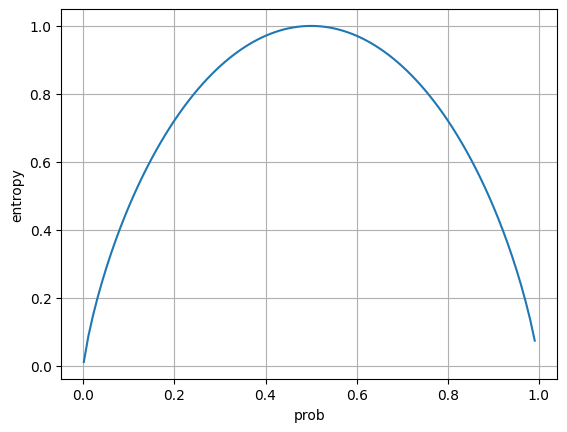

In [29]:
# pの値を0.001から0.999まで0.01刻みで動かす
p = np.arange(0.001, 0.999, 0.01)

# グラフ化
plt.plot(p, calc_entropy(p))
plt.xlabel('prob')
plt.ylabel('entropy')
plt.grid(True)

In [30]:
mushroom_dummy.groupby('fig')['fig'].count()

fig
0    4208
1    3916
Name: fig, dtype: int64

In [31]:
entropy_init = - (0.518 * np.log2(0.518) + 0.482 * np.log2(0.482))
print('毒キノコデータのエントロピーの初期値: {:.3f}'.format(entropy_init))

毒キノコデータのエントロピーの初期値: 0.999


<h3>情報利得：分岐条件の有益さを測る</h3>

In [32]:
mushroom_dummy.groupby(['cap_color_c', 'fig'])['fig'].count().unstack()

fig,0,1
cap_color_c,,
False,4176,3904
True,32,12


In [33]:
# cap_colorがcでない場合のエントロピー
p1 = 4176 / (4176 + 3904)
p2 = 1 - p1
entropy_c0 = - (p1 * np.log2(p1) + p2 * np.log2(p2))
print('entropy_c0: {:.3f}'.format(entropy_c0))

entropy_c0: 0.999


In [34]:
# cap_colorがcである場合のエントロピー
p1 = 32 / (32 + 12)
p2 = 1 - p1
entropy_c1 = - (p1 * np.log2(p1) + p2 * np.log2(p2))
print('entropy_c1: {:.3f}'.format(entropy_c1))

entropy_c1: 0.845


In [35]:
entropy_after = (4176 + 3904) / 8124 * entropy_c0 + (32 + 12) / 8124 * entropy_c1
print('データ分割後の平均エントロピー: {:.3f}'.format(entropy_after))

データ分割後の平均エントロピー: 0.998


In [36]:
print('変数cap_colorの分割によって得られる情報利得: {:.3f}'.format(entropy_init - entropy_after))

変数cap_colorの分割によって得られる情報利得: 0.001


In [37]:
mushroom_dummy.groupby(['gill_color_b', 'fig'])['fig'].count().unstack()

fig,0,1
gill_color_b,,
False,4208.0,2188.0
True,NaN,1728.0


In [38]:
# gill_colorがbでない場合のエントロピー
p1 = 4208 / (4208 + 2188)
p2 = 1 - p1
entropy_b0 = - (p1 * np.log2(p1) + p2 * np.log2(p2))

# gill_colorがbである場合のエントロピー
p1 = 0 / (0 + 1728)
p2 = 1 - p1
entropy_b1 = - (p2 * np.log2(p2))

entropy_after = (4208 + 2188) / 8124 * entropy_b0 + (0 + 1728) / 8124 * entropy_b1
print('変数gill_colorの分割によって得られる情報利得: {:.3f}'. format(entropy_init - entropy_after))

変数gill_colorの分割によって得られる情報利得: 0.269


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# データ分割
X = mushroom_dummy.drop('fig', axis=1)
y = mushroom_dummy['fig']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 決定木クラスの初期化と学習
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model.fit(X_train, y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.883
正解率(test):0.894


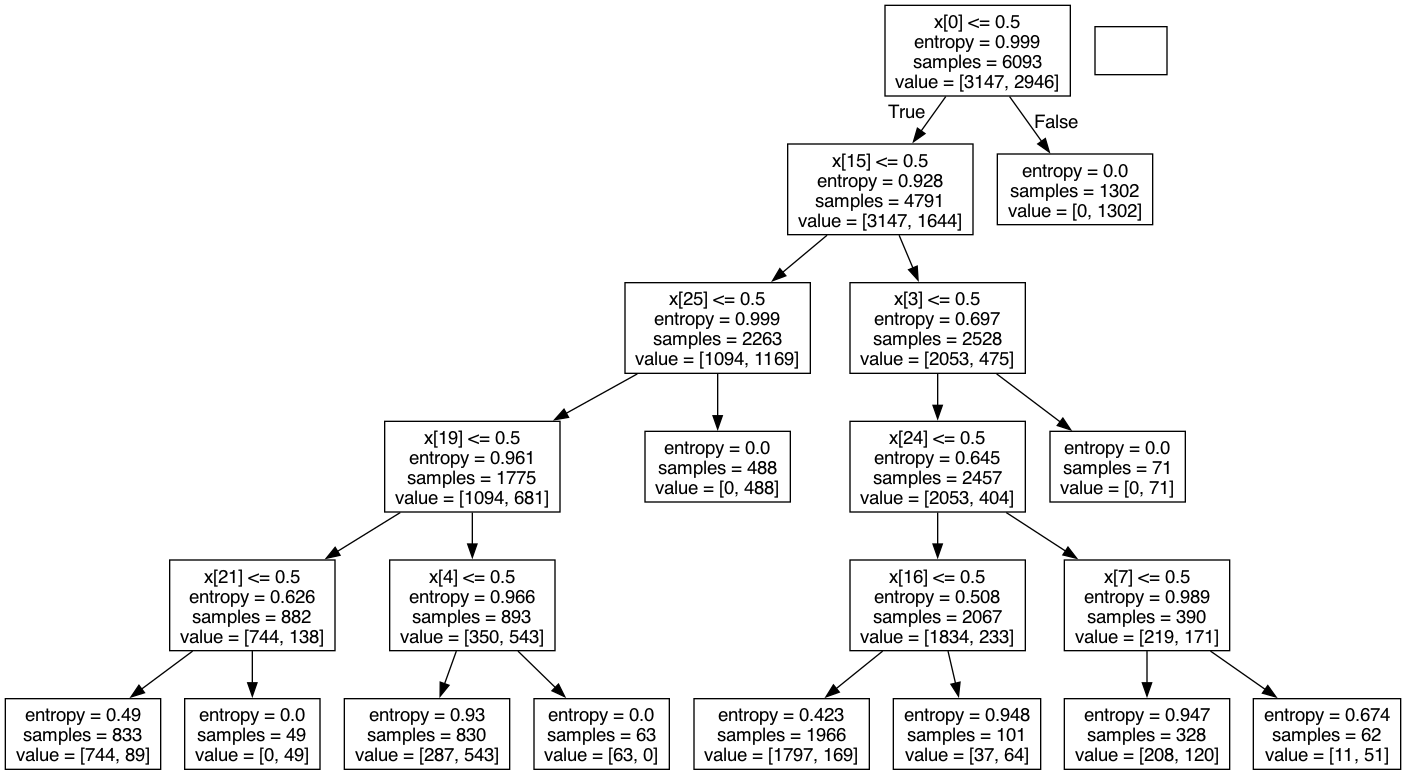

In [40]:
from sklearn import tree
import pydotplus
from six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

<h1>K-NN(k近傍法)

<h3>k-NNのモデル構築</h3>

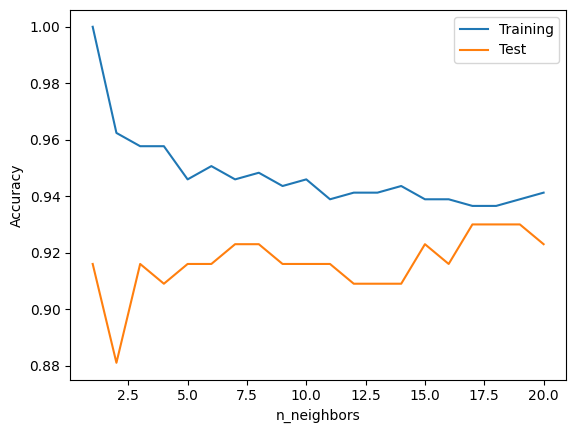

In [41]:
# データモデルを構築するためのライブラリのインポート
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# データセットの読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータ
# stratifyは層化別抽出
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

# グラフ描画用のリストを用意
training_accuracy = []
test_accuracy = []

# 学習
for n_neighbors in range(1,21):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

# グラフを描画
plt.plot(range(1,21), training_accuracy, label='Training')
plt.plot(range(1,21), test_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

<h1>サポートベクターマシン</h1>

<h3>サポートベクターマシンのモデル構築</h3>

In [51]:
# SVMのライブラリ
from sklearn.svm import LinearSVC

# 訓練データとテストデータを分けるライブラリ
from sklearn.model_selection import train_test_split

# データの読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

# クラスの初期化と学習
model = LinearSVC()
model.fit(X_train, y_train)

# 訓練データとテストデータのスコア
print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.932
正解率(test):0.916


/Users/kuramotoyuuta/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/kuramotoyuuta/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [52]:
# データの読み込み
cancer = load_breast_cancer()

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# クラスの初期化と学習
model = LinearSVC()
model.fit(X_train_std, y_train)

# 訓練データとテストデータのスコア
print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.993
正解率(test):0.951


/Users/kuramotoyuuta/.pyenv/versions/3.9.16/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
